**Royen Clément**

12/04/2016

<h1><center> MACHINES À VECTEURS SUPPORT </center></h1>

<h1><center> - Approche intuitive -</center></h1>

In [ ]:
%run 'svmgui.py'

## Question 1
**Observons le cas d'une distribution unimodale**

- Lorsque les classes sont séparables il n'y a aucun impact en changeant la valeur de $C$ sur la frontière ou sur sa marge avec le classifieur linéaire. Quant au classifieur à noyau gaussien, l'impact s'observe surtout sur les marges qui ont tendance à s'élargir lorsque C est grand et à *overfitter* lorsque $C$ est trop petit. Le modèle linéaire est le plus adapté pour un problème de classification à donnée séparable. Lorsque l'on augmente $\gamma$ les marges tendent à disparaître et la frontière vient overfitter une des classes.

- Lorsqu'il y a recouvrement des classes, plus $C$ est bas plus les marges sont étroites sur le modèle linéaire mais la frontière ne semble pas se modifier sensiblement sauf lorsque $C$ est proche de 0 dans quel cas le classifieur ne distingue aucune classe. Pour le classifieur à noyau gaussien on observe le même phénomène que pour le cas des données séparables mis à part le fait que la frontière entoure tantôt une classe tantôt l'autre. Lorsque l'on fait tendre gamma vers zéro cette frontière tend à s'éclater et le classifieur tend vers le classifieur linéaire (on peut s'en convaincre en effectuant un développement limité à l'ordre 1 de l'exponentielle).

- Le choix des paramètres peut être crucial lorsqu'il y a recouvrement des classes. Car il faut séparer les classes tout en évitant l'overfitting.

## Question 2

Les trois zones d'intérêt sont: 
- La zone intermarge hors la zone à forte densité de population où l'ajout d'un d'un point, quelque soit sa classe, tend à déplacer ou rapprocher la frontière vers ce point tout en élargissant la marge, si le point n'est pas dans sa zone estimée, et en la contractant dans le cas contraire. (le $\alpha_i$ associé à ce point est non nul, c'est un vecteur de support).
- Le demi plan contenant les points de la classe ***blanche*** et ***noire*** où dans le premier l'ajout d'un point ***blanc*** n'a aucun effet sur le classifieur ($\alpha_i = 0$ ou presque) et l'ajout d'un point bleu rapproche la frontière et/ou élargit la marge ($\alpha_i \neq 0$). De même pour le deuxième demi plan en inversant le rôle des classes.
- La zone de recouvrement qui n'a aucun effet sur le classifieur ($\alpha_i = 0$ ou presque) à moins de rajouter une quantité considérable de nouveaux points.

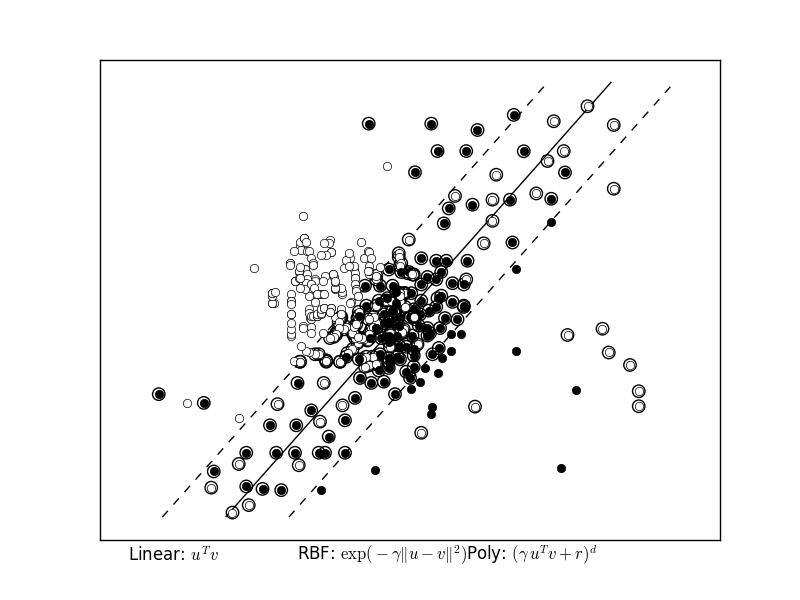

In [1]:
from IPython.display import Image
Image(filename='recouvrement.png')

## Question 3

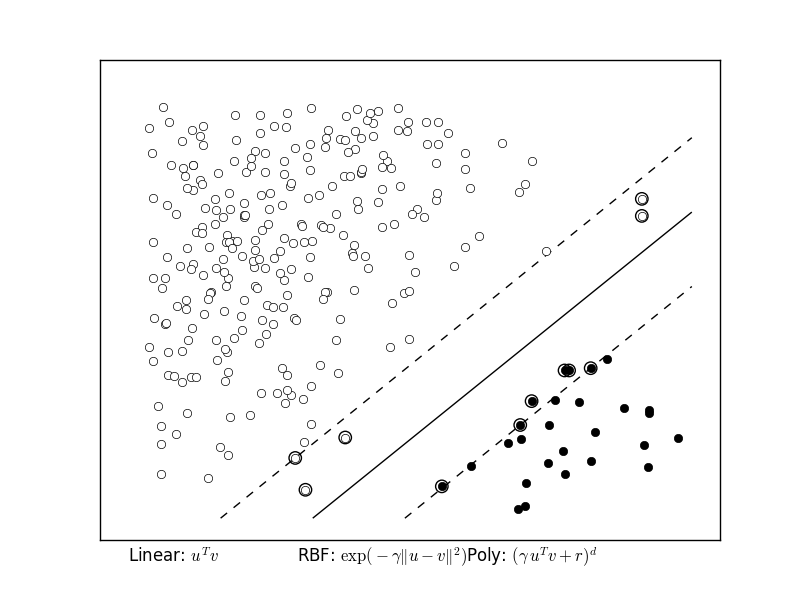

In [2]:
Image(filename='C0_001.png') ## Cas C=0.001

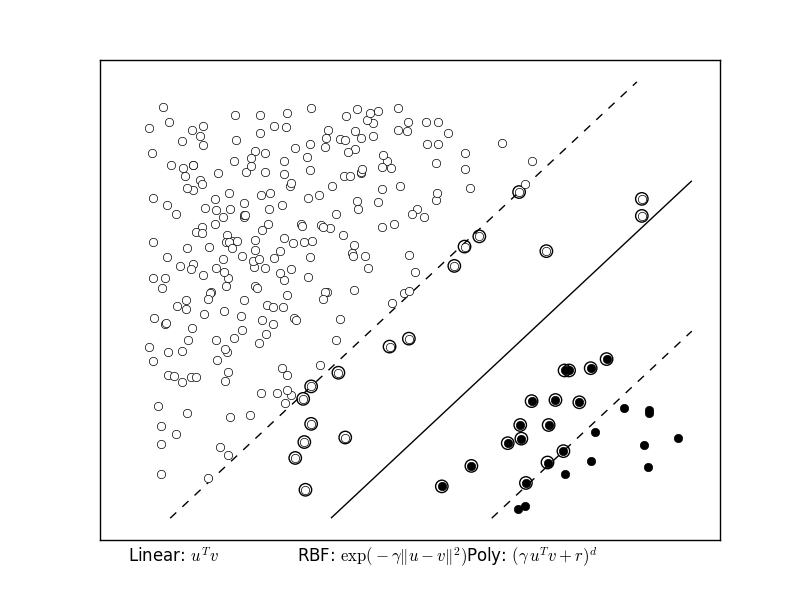

In [3]:
Image(filename='C0_0001.png') ## Cas C=0.0001

Comme on peut s'y attendre lorsque l'on diminue C la marge sépart beaucoup mieux du côté où la population est plus nombreuse (*ici la classe blanche*) que de l'autre (*classe noire*). Ainsi dans notre exemple la majorité des points de classe *noire* sont dans l'espace intermarge alors qu'une minorité de points de classe *blanche* s'y retrouve. Si on continue de diminuer C ou si on étudie le cas où il y a recouvrement des classes, la frontière mettra clairement en défaut la classe *noire* et très peu de donnée de cette classe seront séparées de la classe *blanche*. Il faut donc repondérer l'attache aux données sur la classe moins présente pour que celle-ci puisse être aussi bien séparée que la classe majoritaire, c'est-à-dire proportionnellement à son effectif total, de sorte que le déséquilibre joue moins sur le pouvoir de séparation des classes.

<h1><center>- Classification -</center></h1>

## Question 4

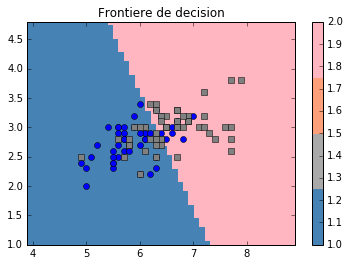

In [2]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from utils import *
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

iris = datasets.load_iris()
X = iris.data  #données
Y = iris.target #classes
X = X[Y != 0, :2] #on restreint à 2 features et à 2 classes
Y = Y[Y != 0]#On restreint à 2 classes: 1 et 2


# classifieur linéaire
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)
# plot
plt.figure(1)
plot_2d(X,Y)
frontiere(clf.predict,X,step=50)
plt.axis('tight')
plt.title('Frontiere de decision')

On remarque qu'il y a recouvrement des classes et que par conséquent le classifieur n'arrive pas bien à séparer les classes du training set dans le plan.

Affichons le score moyen:

In [5]:
print('Score moyen : %d %%'%(clf.score(X,Y)*100))

Score moyen : 73 %


On obtient alors un score de 73% pour $C=1$ sur les données d'apprentissage.

## Question 5

Créons la grille des paramètres $C$ pour les deux classifieurs. Cette recherche se fera par validation croisée sur la moitié des échantillons tirés au hasard et en 5 étapes.

In [6]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

## grille des C à tester: ex [1e-2,1e-1,1,1e1,...,1e10] pour C_range
C_range = np.logspace(-2, 10, 13) 
C_range_p = np.logspace(-2, 5, 8) 
param_gridl = dict(C=C_range,kernel=['linear']) #paramètres pour le svm linéaire
param_gridp = dict(C=C_range_p,kernel=['poly']) #paramètre pour le svm polynomial

## statégie de la validation croisée: en 5 étapes, sur la moitié des donnée et avec tirage aléatoire
cv = StratifiedShuffleSplit(Y_train, n_iter=5, test_size=0.5, random_state=42)

## recherche de la constante optimale C par validation croisée sur la grille param_grid
gridl = GridSearchCV(svm.SVC(), param_grid=param_gridl, cv=cv) # classifieur linéaire
gridp = GridSearchCV(svm.SVC(), param_grid=param_gridp, cv=cv) # classifieur polynomial


Cherchons le $C$ optimal du classifieur linéaire.

Classifieur linéaire : C = 1.00 avec un score de 75.20 %
Score sur le test 68.00 %


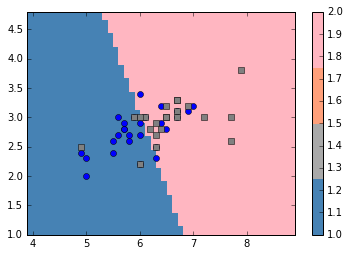

In [7]:
## fitting data
gridl.fit(X_train, Y_train)
## calcul du C optimal
print("Classifieur linéaire : C = %0.2f avec un score de %0.2f %%"
      % (gridl.best_params_['C'], (gridl.best_score_*100)))

## plot du classifieur
plt.figure(1)
plot_2d(X_test,Y_test)
frontiere(gridl.predict,X_test)#les paramètres de gridl sont optimaux
plt.axis('tight')

print("Score sur le test %0.2f %%"%(gridl.score(X_test,Y_test)*100))

Comparons avec un classifieur polynomial

Classifieur linéaire : C = 0.10 avec un score de 72.8 %
Score sur le test 0.70 %


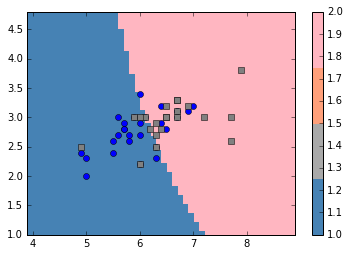

In [8]:
## fitting data
gridp.fit(X_train, Y_train)
## calcul du C optimal
print("Classifieur linéaire : C = %0.2f avec un score de %s %%"
      % (gridp.best_params_['C'], (gridp.best_score_*100)))

## plot du classifieur
plt.figure(1)
plot_2d(X_test,Y_test)
frontiere(gridp.predict,X_test)
plt.axis('tight')

print("Score sur le test %0.2f %%"%(gridp.score(X_test,Y_test)))

On obtient donc des paramètres différents pour des scores différents. La constante $C$ dépend donc du noyau utilisé. Quant au score, comme il n'y a pas beaucoup de données et qu'il y en a encore moins dans les ensembles d'apprentissage et de test, on ne peut pas conclure.

## Question 6

Par une analyse similaire:

Classifieur à noyau gaussien : C = 1 et gamma= 1.00 avec un score de 72.00 %


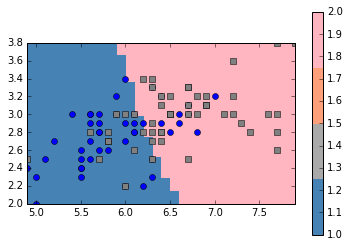

In [9]:
## grille des C à tester: [1e-2,1e-1,1,1e1,...,1e10]
C_range = np.logspace(0, 12, 13,base=2.0)
gamma_range = np.logspace(-8,4,13,base=2.0)
param_gridl = dict(C=C_range,gamma=gamma_range) #paramètres du svm

## statégie de la validation croisée: en 5 étapes, sur la moitié des donnée et avec tirage aléatoire
cv = StratifiedShuffleSplit(Y, n_iter=5, test_size=0.3, random_state=42)

## recherche de la constante optimale C par validation croisée sur la grille param_grid
grid = GridSearchCV(svm.SVC(), param_grid=param_gridl, cv=cv) # classifieur rbf
grid.fit(X,Y)

## affiche le meilleur couple de paramètre
print("Classifieur à noyau gaussien : C = %d et gamma= %0.2f avec un score de %0.2f %%"
      % (grid.best_params_['C'],grid.best_params_['gamma'], (grid.best_score_*100)))

## plot du classifieur
plt.figure(1)
plot_2d(X,Y)
frontiere(grid.predict,X)

Visualisons les performances du classifieurs en faisant varier les paramètres $\gamma$ et $C$ autour de leurs valeurs optimales (on se sert du code fourni dans la documentation de sklearn):

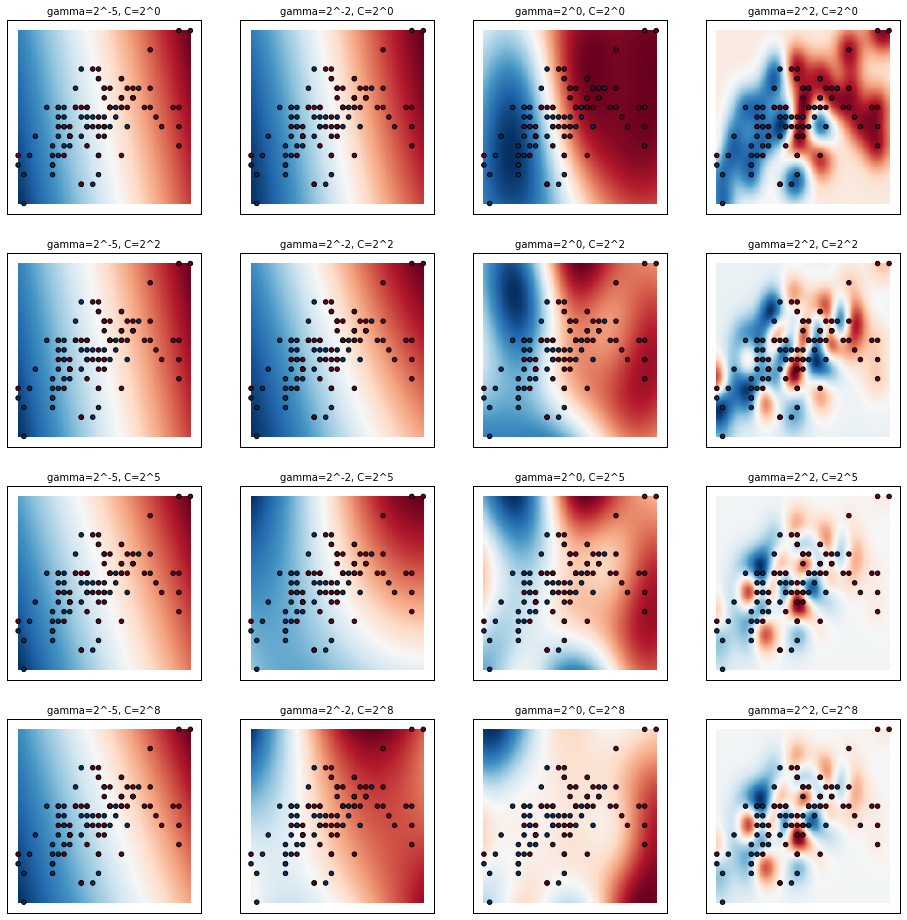

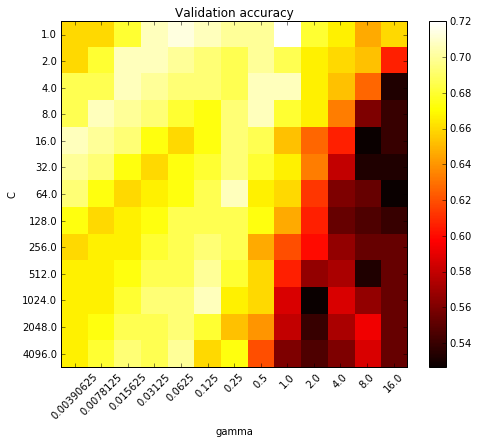

In [10]:
## classifieurs sur un nombre restreint de paramètres de la grille
C_range_rstr = np.logspace(0, 12, 4,base=2.0)
gamma_range_rstr = np.logspace(-8,4,4,base=2.0)
classifiers = []
for C in C_range_rstr:
    for gamma in gamma_range_rstr:
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))


## plot des classifieurs sur la base de la grill restreinte

plt.figure(figsize=(16, 16))
##ranges
xx_max,xx_min = X[:,0].max(), X[:,0].min()
yy_max,yy_min = X[:,1].max(), X[:,1].min()
xx, yy = np.meshgrid(np.linspace(xx_min, xx_max,200), np.linspace(yy_min, yy_max, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(4, 4, k + 1)
    plt.title("gamma=2^%d, C=2^%d" % (np.log(gamma), np.log(C)),
              size='medium')
    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')


## Carte des scores en fonction des paramètres de la grille entière

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range)) # grille complète

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

On identifie très bien le cas $(C,\gamma)=(1,1)$ sur la carte des score et on remarque sur cela se reflète par une frontière curviligne bien nette et à faible marge sur le graphe de la fonction de décision du classifieur. Cette carte n'est pas la même que sur l'exemple donnée par la documentation de sklearn car nous n'avons pas normalisé ni centré les données.

## Question 7

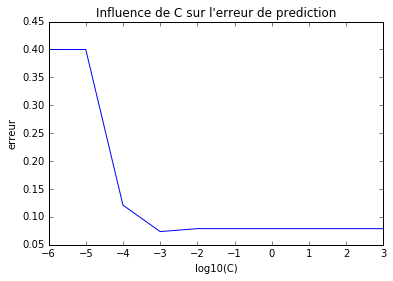

In [11]:
# %load 'svmlfw.py'
"""
=======================================================
Faces recognition example using SVMs and custom kernels
=======================================================

The dataset used in this example is a preprocessed excerpt 
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None, 
                              download_if_missing =True)

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
#names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
#X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]

####################################################################
# Quantitative evaluation of the model quality on the test set
C_range = np.logspace(-6,3,10)
error = []
for (k,C) in enumerate(C_range):
    clf = svm.SVC(kernel='linear', C=C)
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    error.append(1-clf.score(X_test,y_test))

plt.figure()
plt.plot(np.log10(C_range),error)
plt.title('Influence de C sur l\'erreur de prediction')
plt.ylabel('erreur')
plt.xlabel('log10(C)')

Sur ce graphe on observe que la fonction d'erreur sur le test $C \mapsto error_{test}(C)$ est décroissante et qu'à partir de $C=10^{-3}$ elle est constante. On peut alors imaginer d'un point de vue général que pour C assez grand l'erreur est optimale. De plus les temps de calcul se valent.

On peut observer les images que le classifieur a classées pour se convaincre de sa capacité, ainsi que ses coefficients.

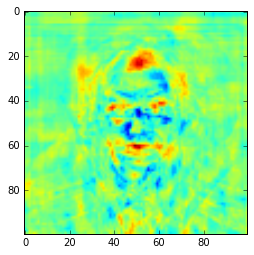

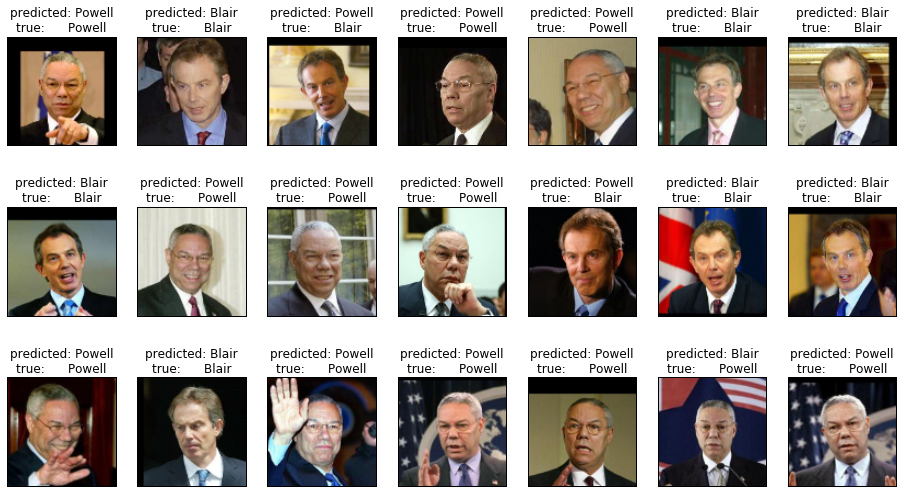

In [13]:
####################################################################
# Look at the coefficients
plt.figure()
plt.imshow(np.reshape(clf.coef_, (h, w)))
####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]
plot_gallery(images_test, prediction_titles,n_row=3,n_col=7)
plt.show()


## Question 8

Il s'agit de calculer la moyenne et l'écart type sur tous les échantillons de chaque composante et de les retrancher/diviser à la matrice de donnée. En faisant cela on rend les composantes plus comparables entre elles car elles perdent leur dimension physique (par exemple, en image, un niveau de gris) et leur distribution comportent la même moyenne (0) et la même variance (1).

## Question 9

On reprend les données précédemment extraites dans la matrice X et on effectue plusieurs découpages train/test de tailles différentes: 20%, 30% 40%, 50%, 60% et 70% (pour la taille de l'ensemble d'apprentissage).

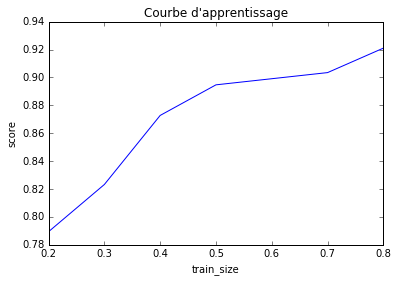

In [14]:
size_range = [0.2,0.3,0.4,0.5,0.7,0.8]
training_scores = [] # liste des score obtenu par les estimateurs trouvés par validation croisée

## boucle sur la taille de l'ensemble d'apprentissage
for size in size_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)
    
    ## grille des C à tester: ex [1e-2,1e-1,1,1e1,...,1e10] pour C_range
    C_range = np.logspace(-6, 3, 10)
    param_grid = dict(C=C_range,kernel=['linear']) #paramètres pour le svm linéaire

    ## statégie de la validation croisée: en 5 étapes, sur la moitié des donnée et avec tirage aléatoire
    cv = StratifiedShuffleSplit(Y_train, n_iter=5, test_size=0.5, random_state=42)

    ## recherche de la constante optimale C par validation croisée sur la grille param_grid
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv) # classifieur linéaire
    
    grid.fit(X_train,y_train)
    training_scores.append(grid.score(X_test,y_test))

## Plot de la courbe d'apprentissage
plt.figure()
plt.plot(size_range,training_scores)
plt.title('Courbe d\'apprentissage')
plt.ylabel('score')
plt.xlabel('train_size')

Le score d'apprentissage croît jusqu'à atteindre un score de 92% pour train_size=0.8. Si on observe pour des valeurs de train_size plus grandes le score chute, ce qui s'explique par le fait que l'ensemble de test ne contient plus assez d'échantillon pour tester de façon réaliste le classifieur. 

**Remarque :** On pourrait étudier cette même courbe avec un dataset beaucoup plus grand pour se rapprocher du vrai comportement du classifieur à l'apprentissage.

## Question 10

On importe le code de l'example

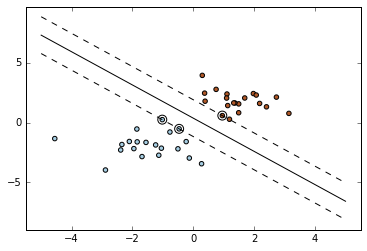

In [15]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = np.array([0] * 20 + [1] * 20)

def clas(tol=0.001,plot=False):
    # fit the model
    clf = svm.SVC(kernel='linear',tol=tol)
    clf.fit(X, Y)

    if(plot):
        # get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-5, 5)
        yy = a * xx - (clf.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors
        b = clf.support_vectors_[0]
        yy_down = a * xx + (b[1] - a * b[0])
        b = clf.support_vectors_[-1]
        yy_up = a * xx + (b[1] - a * b[0])
        # plot the line, the points, and the nearest vectors to the plane
        plt.plot(xx, yy, 'k-')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=80, facecolors='none')
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

        plt.axis('tight')
        plt.show()
    return clf
clf = clas(plot=True)

On code la fonction fonc qui affiche les fonctionnelles primale et duale

In [16]:
def fonc(clf, X, y):
    #paramètres
    C = clf.C
    w = clf.coef_[0]
    w0 = clf.intercept_[0]
    # indice des vecteurs de support
    idx = clf.support_
    alpha = clf.dual_coef_[0]
    # on transformes les label en -1 ou 1
    y = 2 * y - 1
    # On construit la matrice du noyau sur le support de la machine
    K = np.array([[np.dot(X[i,:],X[j,:]) for i in idx] for j in idx])
    # Calcul dans le cas primal avec l=hinge
    fonc_prim = 0.5 * np.linalg.norm(w)**2 + C * sum([max(0,1-y[i]*(np.dot(w,X[i,:])+w0)) for i in idx])
    # Calcul dans le cas dual avec uniquement le noyau et les alpha
    fonc_dual = sum(alpha/y[idx]) - 0.5 * (alpha).dot(np.dot(K,alpha))
    
    print('Fonctionnelle primale %f'%fonc_prim)
    print('Fonctionnelle duale %f'%fonc_dual)
    print('Différence fonctionnelle: %f'%abs(fonc_prim-fonc_dual))

fonc(clf,X,Y)

Fonctionnelle primale 0.617380
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000197


Les valeurs des deux fonctionnelles sont presque égales. Théoriquement elle doivent être égales car le problème dual s'obtient en substituant $w$ dans le problème primal par sont expression en fonction des $\alpha$ que l'on trouve en annulant les dérivées partielles de sa fonctionnelle.

Regardons alors l'influence du paramètre de tolérance

In [17]:
tol_range = np.logspace(-8,0,9)
for tol in tol_range:
    clf = clas(tol=tol)
    print 'Tol = %s'%tol
    fonc(clf,X,Y)


Tol = 1e-08
Fonctionnelle primale 0.617182
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000000
Tol = 1e-07
Fonctionnelle primale 0.617182
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000000
Tol = 1e-06
Fonctionnelle primale 0.617183
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000000
Tol = 1e-05
Fonctionnelle primale 0.617183
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000000
Tol = 0.0001
Fonctionnelle primale 0.617194
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000012
Tol = 0.001
Fonctionnelle primale 0.617380
Fonctionnelle duale 0.617182
Différence fonctionnelle: 0.000197
Tol = 0.01
Fonctionnelle primale 0.623996
Fonctionnelle duale 0.617168
Différence fonctionnelle: 0.006827
Tol = 0.1
Fonctionnelle primale 0.638669
Fonctionnelle duale 0.614892
Différence fonctionnelle: 0.023777
Tol = 1.0
Fonctionnelle primale 1.359550
Fonctionnelle duale 0.496485
Différence fonctionnelle: 0.863065


Plus tol augmente plus il y a de différence entre l'évaluation des fonctionnelles primales et duales. En deça de 1**e$^{-4}$** cette différence n'est plus perceptible. Le paramètre tolérance permet donc de définir un niveau d'erreur d'optimisation du problème dual (algorithmiquement facile) par rapport à l'optimum du problème primal (plus difficile).

<h1><center> - Régression - </center></h1>

## Question 11

In [26]:
# %load 'drugactivity.py'
"""
=======================================================
Drug activity prediction
=======================================================

Please, dowload the dataset from:

  https://drive.google.com/file/d/0B6VyRTVgbDFeWFFUUVRidUR3MFE/view?usp=sharing (25MB)

and change the path in the following script.

This script provides two precomputed kernel matrices (K_train, K_test) along with the corresponding labels 
for each line K(x_i, ...) (namely y_train and y_test).

Author: Maxime Sangnier (Telecom ParisTech)
Date: 18-Nov-2015

"""

import numpy as np
path = "data_ncicancer"

# Load the data
K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Load the kernel
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # Load the targets
y_ = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets

# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]/2], indices[K.shape[0]/2:]
K_train = K[train_idx][:, train_idx]
y_train = y_[train_idx]
K_test = K[test_idx][:, train_idx]
y_test = y_[test_idx]

Les hyperparamètres sont $C$ et $epsilon$. On procède par validation croisée pour les trouver.

In [27]:
## grille des C à tester: [1e-2,1e-1,1,1e1,...,1e10]
C_range = np.logspace(-6, 3, 10)
epsilon_range = np.logspace(-12,1,13)

param_grid = dict(C=C_range,epsilon=epsilon_range) #paramètres du svm

## recherche de les constantes optimales C et epsilon par validation croisée sur la grille param_grid
grid = GridSearchCV(svm.SVR(kernel='precomputed',tol=1e-5), param_grid=param_grid, cv=5)
grid.fit(K_train,y_train)

## affiche le meilleur couple de paramètre
print("Classifieur à noyau gaussien : C = %d et epsilon= %0.2f avec un score de %f"
      % (grid.best_params_['C'],grid.best_params_['epsilon'], (grid.best_score_)))

y_pred = grid.predict(K_test)
print("score de généralisation : %f"%grid.score(K_test,y_test))

Classifieur à noyau gaussien : C = 0 et epsilon= 0.01 avec un score de 0.278725
score de généralisation : 0.383752


Le fonction score du régresseur correspond à un coefficient adimensionné valant au maximum 1. Le score que nous avons obtenu est relativement bas mais le noyau étant donné il faudrait explorer d'autres pistes..